### Eigen Vector
For a square matrix `A`, $v \in \mathbb{R}^n$ is eigen vector of matrix A when:
- $v \neq 0$
- $A.v = \lambda .v$

To solve the equation, we transform to characteristic equation:
- $(A - \lambda.I).v = 0$
- Because $v$ is non-zero vector, the matrix $(A - \lambda.I)$ must be __singular matrix__ where determinant must be 0
- The reason for $(A - \lambda.I)$ must be singular value is because if $M = (A - \lambda.I)$ is not singular matrix or it is invertible, then simply multiply both side for $(M^{-1})$ then the equation looks like this $M^{-1} (M.v) = M^{-1} 0 = I.v = 0 \implies v = 0$
- $det(A - \lambda.I) = 0$ or $(a_{11} - \lambda)(a_{22} - \lambda) - a_{12} a_{21}$

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageOps
from scipy.linalg import svd

### SVD

In [6]:
input_path = "images/svd_image.jpg"

In [25]:
img = Image.open(input_path)
img = img.convert("L")

In [26]:
A = np.asarray(img)
# A = A.reshape(A.shape[0], -1)
A_sum = np.sum(A, axis=0)
A = A / A_sum
A.shape

(370, 440)

In [27]:
U, s, V = svd(A, full_matrices=False)
S = np.diag(s)
### U and V are already sorted by values of S

In [28]:
U.shape

(370, 370)

In [29]:
S.shape

(370, 370)

In [30]:
V.shape

(370, 440)

In [31]:
A1 = np.dot(U, np.dot(S, V))
np.allclose(A, A1)

True

### Truncated SVD

In [43]:
errs = []
for k in [50, 100, 250, 300]:
    U_k = U[:, :k]
    S_k = S[:k, :k]
    V_k = V[:k, :]
    A1 = U_k.dot(S_k).dot(V_k)
    info = np.trace(S_k)**2 / np.trace(S)**2
    errs.append((k, A1, info))
df = pd.DataFrame(errs, columns=["k", "A_approx", "info"])

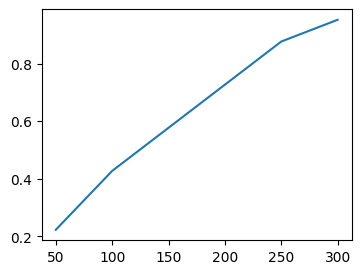

In [44]:
plt.figure(figsize=(4, 3))
plt.plot(df["k"], df["info"])

Text(0.5, 1.0, 'Approximate Image with k = 300')

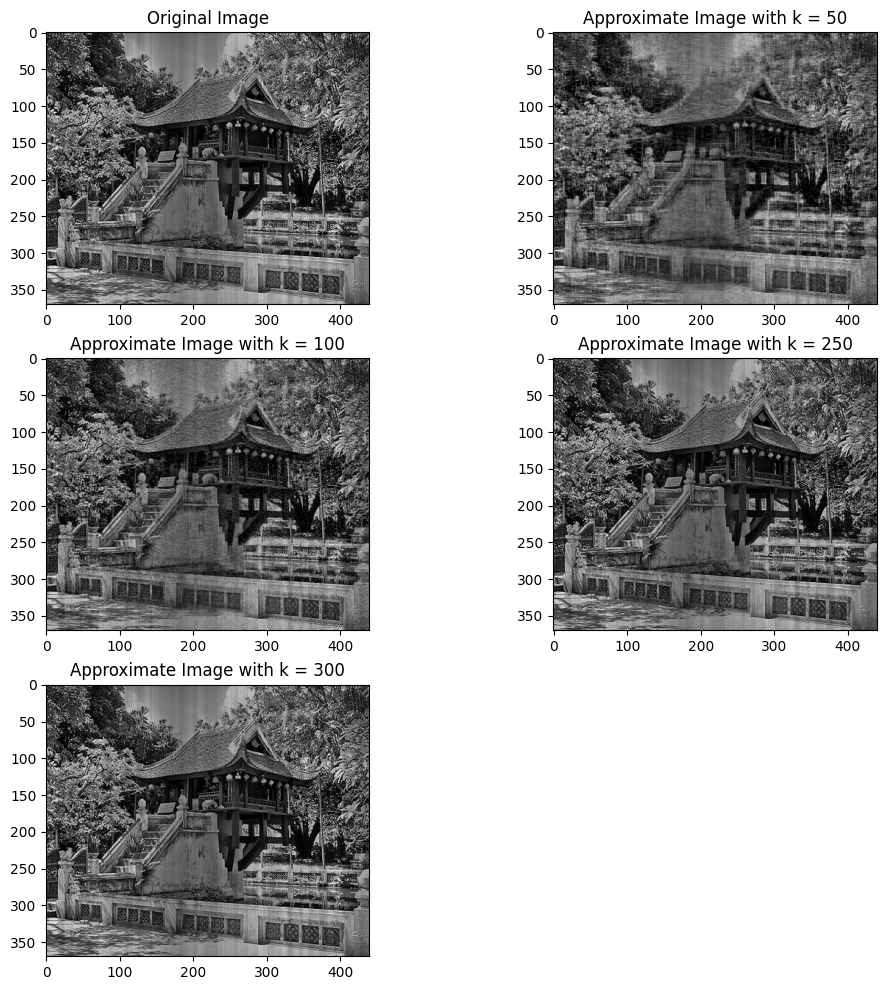

In [47]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.imshow(A, cmap='gray', vmin=0, vmax=np.max(A))
plt.title("Original Image")

k = 50
A1 = df["A_approx"][0]
plt.subplot(3, 2, 2)
plt.imshow(A1, cmap='gray', vmin=0, vmax=np.max(A1))
plt.title(f"Approximate Image with k = {k}")

k = 100
A1 = df["A_approx"][1]
plt.subplot(3, 2, 3)
plt.imshow(A1, cmap='gray', vmin=0, vmax=np.max(A1))
plt.title(f"Approximate Image with k = {k}")

k = 250
A1 = df["A_approx"][2]
plt.subplot(3, 2, 4)
plt.imshow(A1, cmap='gray', vmin=0, vmax=np.max(A1))
plt.title(f"Approximate Image with k = {k}")

k = 300
A1 = df["A_approx"][3]
plt.subplot(3, 2, 5)
plt.imshow(A1, cmap='gray', vmin=0, vmax=np.max(A1))
plt.title(f"Approximate Image with k = {k}")